# Deep Learning Intro

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Shallow Model

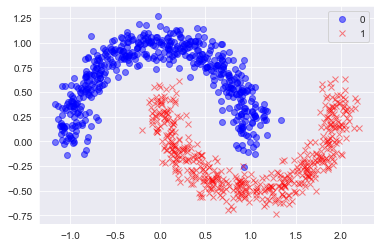

In [2]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


In [12]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [14]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 930us/step - loss: 0.3182 - accuracy: 0.8467


In [15]:
print("The Accuracy score on the Train set is: \t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is: 	0.847


319/319 [==============================] - 0s 857us/step


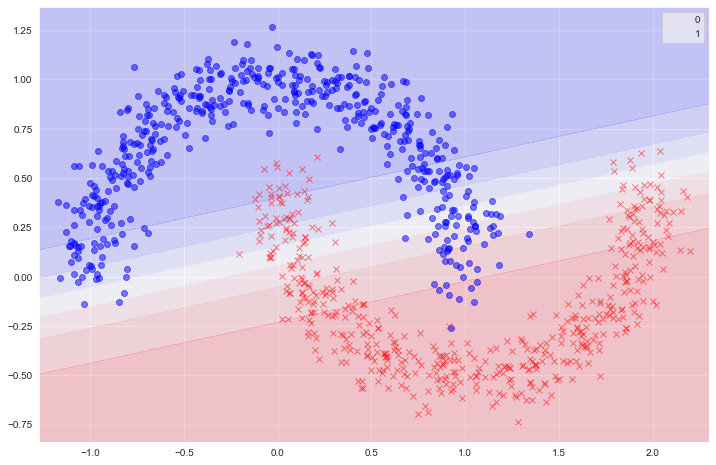

In [18]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
plot_decision_boundary(model, X, y)

## Deep Model

In [19]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [21]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 876us/step - loss: 0.0061 - accuracy: 0.9967


[0.006140042096376419, 0.996666669845581]

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
y_train_pred = np.argmax(model.predict(y_train), axis=-1)
y_test_pred = np.argmax(model.predict(y_test), axis=-1)

# print("The Accuracy score on the Train set is: \t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
# print("The Accuracy score on the Test set is: \t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

ValueError: in user code:

    File "/Users/johnoshalusi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/johnoshalusi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/johnoshalusi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/johnoshalusi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/johnoshalusi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/johnoshalusi/.pyenv/versions/3.10.1/lib/python3.10/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None


319/319 [==============================] - 0s 884us/step


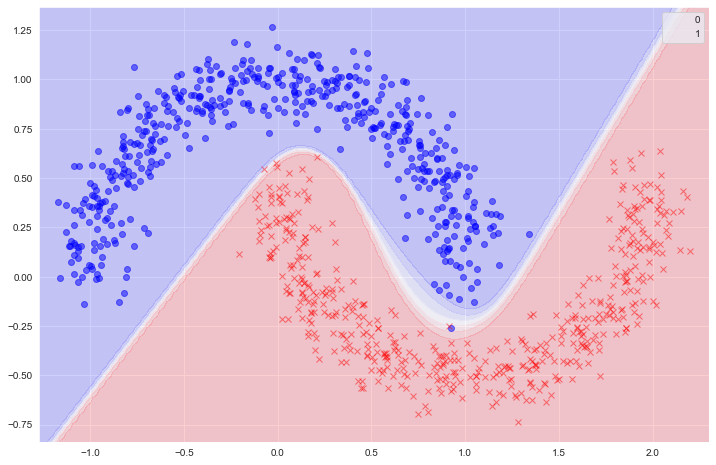

In [25]:
plot_decision_boundary(model, X, y)